<a href="https://colab.research.google.com/github/amitagar1/EVA2.0/blob/master/Session3_Assignement_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries and modules**

In [0]:
#Installing Keras Package
# https://keras.io/
#!pip install -q keras
import keras

In [0]:
#Installing Depenendcies to Run Classification Problem on MNIST dataset
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


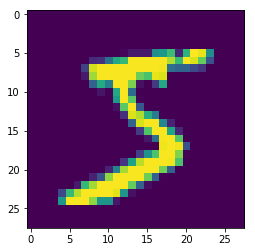

In [5]:
# Printing the dimensions of training dataset and displaying 1st Image in Dataset
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Changing the dimension of the Images from 2D to 3D
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# First Making datatype to float type and then Normalizing the pixel value
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
# Defining the model architecture 
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(24, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(24, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 10))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys


In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 24)        240       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 24)        5208      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 16)        3472      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 10)        170       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_6 (Flatten)          (None, 10)                0         
__________

In [0]:
# Defining parameters for Optimizer function
adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1517 - acc: 0.9545
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0542 - acc: 0.9827
Epoch 3/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0399 - acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0332 - acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0273 - acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0221 - acc: 0.9924
Epoch 7/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0189 - acc: 0.9939
Epoch 8/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0163 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0144 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0126 -

In [0]:
# Validating the model on Validation data set
score = model.evaluate(X_test, Y_test, verbose=0)

In [67]:
print(score)

[0.039650973909209276, 0.9891]


In [0]:
# APplying model for prediction 
y_pred = model.predict(X_test)

In [69]:
print(y_pred[:9])
print(y_test[:9])

[[3.78966710e-17 3.10590482e-14 1.86132828e-11 3.85533456e-13
  5.07224435e-22 3.19395817e-18 1.80907723e-27 1.00000000e+00
  1.90290663e-16 1.76001764e-13]
 [2.15166928e-13 3.20008568e-11 1.00000000e+00 5.06729202e-15
  6.44557662e-18 6.11384442e-20 1.16172155e-10 1.68345988e-15
  1.89775170e-13 3.42875980e-19]
 [1.79619715e-08 9.99992013e-01 1.94483800e-06 1.04384634e-09
  4.72230067e-06 6.99458225e-09 7.18156201e-08 1.20366977e-07
  1.21349740e-06 7.18017833e-12]
 [9.99985933e-01 4.37587900e-12 4.37532481e-06 6.00375416e-10
  2.63190267e-13 3.87819554e-09 2.80550410e-07 1.06110010e-08
  6.17661311e-10 9.44000931e-06]
 [7.79857624e-13 4.63468511e-14 5.40927025e-12 5.44754231e-14
  9.99994636e-01 1.17029026e-15 1.69575996e-13 3.73635801e-12
  4.17575641e-10 5.32592594e-06]
 [2.09538200e-08 9.99997616e-01 3.67779904e-07 1.59733650e-11
  1.02551644e-06 6.18100848e-11 1.56863675e-10 8.84257020e-07
  7.36508809e-08 1.85154128e-10]
 [1.20665286e-17 4.52396509e-10 1.24235189e-09 6.16785760e

In [0]:
# Extracting layers from the model
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_29'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()